In [1]:
current_high_score = 0.8005
dataset_num = 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from lightgbm import LGBMClassifier

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
train = pd.read_csv(f'../../data/preproc_data/train_{dataset_num}_1.csv')
test = pd.read_csv(f'../../data/preproc_data/test_{dataset_num}_1.csv')

In [5]:
X_train = train.drop(columns=['Transported', 'PassengerId'])
y_train = pd.DataFrame(train['Transported'])

X_train.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0.0,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,...,AgeGroup_3,AgeGroup_4,AgeGroup_5,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,Expenditure
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.700480,2.302585,3.258097,6.309918,3.806662,1,6.602588
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,3.784190,8.182280,0.000000,8.812248,3.912023,2,9.248021
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,7.157735,5.918894,8.110728,5.267858,2,8.551981
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,5.717028,4.262680,5.023881,6.338594,1.098612,1,6.995766


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6954, 42), (1739, 42), (6954,), (1739, 1))

In [1]:
lgbm_param_grid = {
    'num_leaves': [31, 50, 70, 100, 127],
    'min_data_in_leaf': [20, 50, 100, 200],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'subsample_freq': [0, 5, 10],
    'colsample_bytree': [0.6, 0.8, 1.0],
    # 'reg_alpha': [0, 0.1, 1, 10],
    # 'min_child_weight': [1, 5, 10],
    # 'max_bin': [63, 127, 255],
    # 'feature_pre_filter': [True],
    # 'boosting_type': ['gbdt', 'dart', 'goss'],
    # 'objective': ['binary'],
}

lgbm_clf = LGBMClassifier()

lgbm_grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=lgbm_param_grid, 
                               cv=3, scoring='accuracy', verbose=2, n_jobs=1)
lgbm_grid_search.fit(X_train, y_train)

lgbm_best_model = lgbm_grid_search.best_estimator_
best_params = lgbm_grid_search.best_params_

lgbm_pred = lgbm_best_model.predict(X_test)

lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
conf_matrix = confusion_matrix(y_test, lgbm_pred)
class_report = classification_report(y_test, lgbm_pred)


NameError: name 'LGBMClassifier' is not defined

In [2]:
# Display results
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


NameError: name 'best_params' is not defined

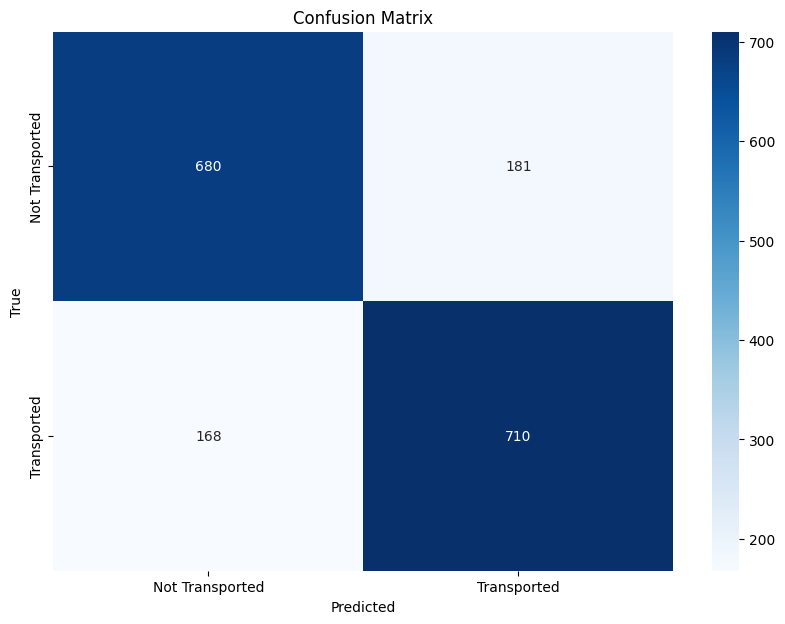

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Transported', 'Transported'], 
            yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_no_id = test.copy().drop(columns='PassengerId')
predictions = lgbm_best_model.predict(test_no_id)

predictions_bool = predictions == 1

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Transported': predictions_bool
})

submission.to_csv(f'../../data/submissions/data_{dataset_num}/2_1/GB_train_test_data_{dataset_num}_1.csv', index=False)
display("Submission file generated successfully.")


'Submission file generated successfully.'